In [2]:
#imports here !!

import pandas as pd
import numpy as np
import random
import datetime
#from sklearn.model_selection import train_test_split
##### NOTE : I used sklearn just for train_test_split to randomly shuffle data
import matplotlib.pyplot as plt
from sympy import Matrix, init_printing



### DATA SETUP
### Dataset creation :  Dividing csv into : Train data, Validation data, Test data
### Data features are normalised and this is considered for training and predictions

In [32]:
###### Dataset creation..
Raw_data = pd.read_csv('hour.csv' )
Raw_data['dteday'] = Raw_data['dteday'].astype('datetime64[ns]')
Raw_data['day'] = (Raw_data.dteday.dt.day) #### extracting the "day" from dteday feature. For creating train and test set 
Raw_data['bias'] = 0*Raw_data['day']  + 1  ##### adding  a bias term  to data

######## normalisation.

normalised_df = Raw_data.copy()
normalised_df.head()
normalised_df.iloc[:,2:14] = Raw_data.iloc[:,2:14].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
Data = normalised_df.copy()
#printmd("**RAW DATA**", color="RED")

print("RAW DATA")
display(Raw_data)

print("Normalised Data")
#printmd("**NORMALISED DATA**", color="RED")
display(Data)


RAW DATA


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,bias
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31,1
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31,1
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31,1
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,31,1


Normalised Data


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,bias
0,1,2011-01-01,-1.356595,-1.005105,-1.610392,-1.669956,-0.172107,1.493848,-1.466858,-0.665174,-1.334609,-1.093249,0.947345,-1.553844,3,13,16,1,1
1,2,2011-01-01,-1.356595,-1.005105,-1.610392,-1.525330,-0.172107,1.493848,-1.466858,-0.665174,-1.438475,-1.181698,0.895513,-1.553844,8,32,40,1,1
2,3,2011-01-01,-1.356595,-1.005105,-1.610392,-1.380705,-0.172107,1.493848,-1.466858,-0.665174,-1.438475,-1.181698,0.895513,-1.553844,5,27,32,1,1
3,4,2011-01-01,-1.356595,-1.005105,-1.610392,-1.236079,-0.172107,1.493848,-1.466858,-0.665174,-1.334609,-1.093249,0.636351,-1.553844,3,10,13,1,1
4,5,2011-01-01,-1.356595,-1.005105,-1.610392,-1.091454,-0.172107,1.493848,-1.466858,-0.665174,-1.334609,-1.093249,0.636351,-1.553844,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,-1.356595,0.994863,1.588421,1.077931,-0.172107,-0.998959,0.681690,0.898898,-1.230743,-1.269565,-0.141133,-0.211685,11,108,119,31,1
17375,17376,2012-12-31,-1.356595,0.994863,1.588421,1.222556,-0.172107,-0.998959,0.681690,0.898898,-1.230743,-1.269565,-0.141133,-0.211685,8,81,89,31,1
17376,17377,2012-12-31,-1.356595,0.994863,1.588421,1.367182,-0.172107,-0.998959,0.681690,-0.665174,-1.230743,-1.269565,-0.141133,-0.211685,7,83,90,31,1
17377,17378,2012-12-31,-1.356595,0.994863,1.588421,1.511807,-0.172107,-0.998959,0.681690,-0.665174,-1.230743,-1.181698,-0.348463,-0.456086,13,48,61,31,1


### Creating Train and test set , by divindig in terms of "day" feature
### Later Validation set is created from train set , by the ratio 0.8 : 0.2
### Dividing data into : X (feature data) , Y(target data)

#### Features : ['bias','season','mnth','hr','workingday','weathersit','windspeed','temp']

In [33]:
Train_data = Data[ Data['day'] < 20 ]
Test_data = Data[ Data['day'] > 19 ]

Raw_train = Raw_data[Raw_data['day'] < 20]
Raw_test = Raw_data[Raw_data['day'] > 19]

##########################
## Features to be considered
##########################
features = ['bias','season','mnth','hr','workingday','weathersit','windspeed','temp']

#### Creates validation data by splitting data randomly in the "ratio"
def create_validation_data(X_train_data,ratio):
    np.random.seed(42)
    Train = Train_data.sample(frac = ratio) 
    Validation = Train_data.drop(Train.index)
    return Train, Validation

training_data,validation_data = create_validation_data(Train_data,0.8)


features = ['bias','season','mnth','hr','workingday','weathersit','windspeed','temp']

X_train_df = pd.DataFrame(training_data,columns = features)
Y_train_df = pd.DataFrame(training_data,columns = ['cnt'])

X_validation_df = pd.DataFrame(validation_data,columns = features)
Y_validation_df = pd.DataFrame(validation_data,columns = ['cnt'])


display(X_train_df)
display(Y_train_df)

,bias,season,mnth,hr,workingday,weathersit,windspeed,temp
4693,1,0.450223,0.134415,-0.079074,0.681690,-0.665174,-1.553844,1.677500
9009,1,-1.356595,-1.610392,-0.802202,-1.466858,-0.665174,-0.821460,-2.061670
8162,1,1.353632,1.588421,0.933305,-1.466858,-0.665174,0.031898,-1.334609
14093,1,0.450223,0.425217,-0.223700,0.681690,0.898898,0.031898,1.158171
12642,1,-0.453186,-0.156386,1.656433,0.681690,-0.665174,0.519881,0.638841
...,...,...,...,...,...,...,...,...
9457,1,-1.356595,-1.319590,1.656433,0.681690,-0.665174,-0.699669,-1.230743
7258,1,1.353632,1.297620,-1.525330,0.681690,0.898898,-1.553844,-0.503683
9007,1,-1.356595,-1.610392,-1.091454,-1.466858,-0.665174,-0.699669,-1.957804
11869,1,-0.453186,-0.447187,0.933305,0.681690,0.898898,-1.553844,0.431110


,cnt
4693,127
9009,13
8162,163
14093,233
12642,222
...,...
9457,77
7258,17
9007,8
11869,300


In [34]:
########### Converting data in dataframes to numpy arrays for calculations

X_train = X_train_df.to_numpy()
Y_train = Y_train_df.to_numpy()

X_validation = X_validation_df.to_numpy()
Y_validation = Y_validation_df.to_numpy()

X_test = X_test_data.to_numpy()
Y_test = Y_test_data.to_numpy()


# Prob 4.2  : Visualizing statistics of count, wrt features
### Observations are in the report

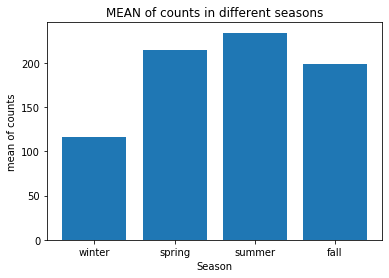

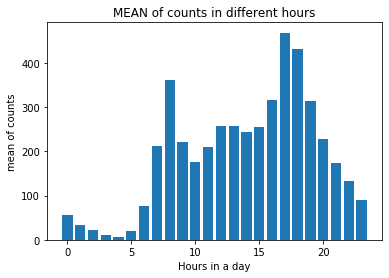

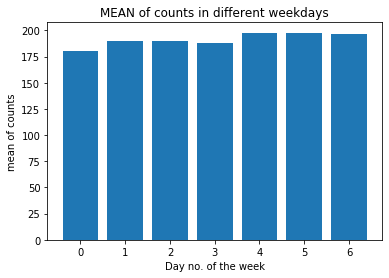

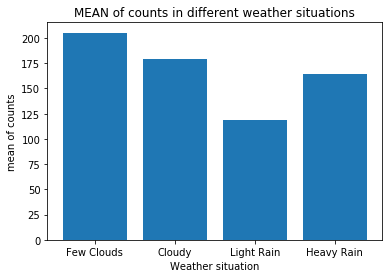

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [35]:
### mean of counts over seasons:

mean_sn_df = Train_data[["season","cnt"]].groupby("season").mean()
mean_sn = mean_sn_df.to_numpy()
y = np.reshape(mean_sn,(4,))
season = ['winter', 'spring', 'summer', 'fall' ]
plt.bar(season,y)
plt.xlabel('Season')
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different seasons')
plt.show()
plt.figure()



### mean of counts over hours:
mean_hr_df = Train_data[["hr","cnt"]].groupby("hr").mean()
mean_hr = mean_hr_df.to_numpy()
y = np.reshape(mean_hr,(24,))
hr = np.arange(0,24)
plt.bar(hr,y)
plt.xlabel('Hours in a day')
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different hours')
plt.show()
plt.figure()


### mean of counts over weekdays:
mean_wd_df = Train_data[["weekday","cnt"]].groupby("weekday").mean()
mean_wd = mean_wd_df.to_numpy()
y = np.reshape(mean_wd,(7,))
wd = np.arange(0,7)
plt.bar(wd,y)
plt.xlabel('Day no. of the week')
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different weekdays')
plt.show()
plt.figure()


### mean of counts over difference weathersit
mean_ws_df = Train_data[["weathersit","cnt"]].groupby("weathersit").mean()
mean_ws = mean_ws_df.to_numpy()
y = np.reshape(mean_ws,(4,))
ws = ['Few Clouds','Cloudy','Light Rain','Heavy Rain']
plt.bar(ws,y)
plt.xlabel('Weather situation')
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different weather situations')
plt.show()
plt.figure()

# Prob 4.3
### Plotting count vs features

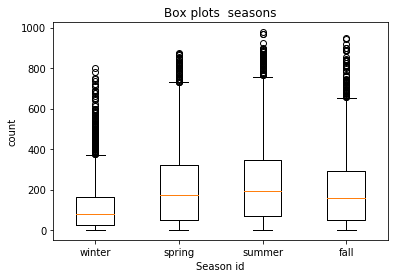

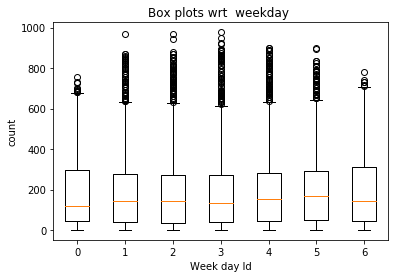

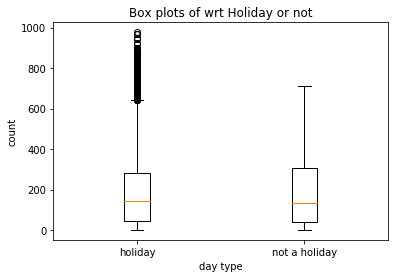

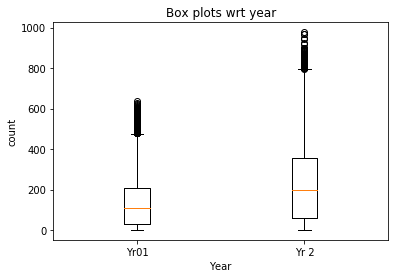

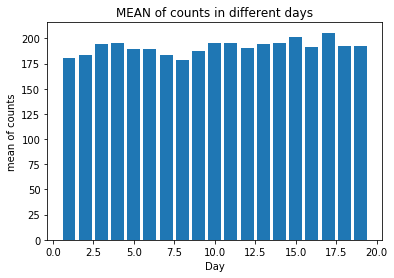

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [36]:
### feature 1 : season

s1 = Raw_train[ Raw_train['season'] ==1 ]['cnt']
s2 = Raw_train[ Raw_train['season'] ==2 ]['cnt']
s3 = Raw_train[ Raw_train['season'] ==3 ]['cnt']
s4 = Raw_train[ Raw_train['season'] ==4 ]['cnt']

data = [s1,s2,s3,s4]
plt.xlabel('Season id')
plt.ylabel('count')
plt.title('Box plots  seasons')
plt.boxplot(data,labels = ['winter','spring','summer','fall'])
plt.figure()





#Feature 2 : weekday
s0 = Raw_train[ Raw_train['weekday'] ==0 ]['cnt']
s1 = Raw_train[ Raw_train['weekday'] ==1 ]['cnt']
s2 = Raw_train[ Raw_train['weekday'] ==2 ]['cnt']
s3 = Raw_train[ Raw_train['weekday'] ==3 ]['cnt']
s4 = Raw_train[ Raw_train['weekday'] ==4 ]['cnt']
s5 = Raw_train[ Raw_train['weekday'] ==5 ]['cnt']
s6 = Raw_train[ Raw_train['weekday'] ==6 ]['cnt']

data = [s0,s1,s2,s3,s4,s5,s6]
plt.xlabel('Week day Id')
plt.ylabel('count')
plt.title('Box plots wrt  weekday ')
plt.boxplot(data,labels = ['0','1','2','3','4','5','6'])
plt.figure()



## Feature : 03 : hday

s1 = Raw_train[ Raw_train['holiday'] ==0 ]['cnt']
s2 = Raw_train[ Raw_train['holiday'] ==1 ]['cnt']


data = [s1,s2]
plt.xlabel('day type')
plt.ylabel('count')
plt.title('Box plots of wrt Holiday or not')
plt.boxplot(data,labels = ['holiday','not a holiday'])
plt.figure()


#### Feature 04 : Year

s1 = Raw_train[ Raw_train['yr'] ==0 ]['cnt']
s2 = Raw_train[ Raw_train['yr'] ==1 ]['cnt']

data = [s1,s2]
plt.xlabel('Year')
plt.ylabel('count')
plt.title('Box plots wrt year')
plt.boxplot(data,labels = ['Yr01','Yr 2'])
plt.figure()

#### Feature 05 :  Histogram describing mean counts for different day:
### mean of counts over seasons:

mean_sn_df = Train_data[["day","cnt"]].groupby("day").mean()
mean_sn = mean_sn_df.to_numpy()
y = np.reshape(mean_sn,(19,))
day =np.arange(1,20)
plt.bar(day,y)
plt.xlabel('Day')
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different days')
plt.show()
plt.figure()

# Prob. 4.4 
### Using Gradient descent for fitting data, and performing regularisation

In [65]:
###### The Algo is derived in the handwritten solution as part of Q 4.1

##### This is written as a Object oriented code
class Poisson_reg:
    
    #### initialising parameters
    def __init__ (self,beta,lr,**reg):
        self.beta_init = beta  ### initial beta
        self.lr = lr   ### learning rate
        self.reg_type= reg["reg_type"] ### regularisation type
        if(self.reg_type !=None):
            self.reg_param = reg["reg_param"]     ### lamda for regularisation : hyper parameter
        
    
    
    #### Applying gradient descent : For theory and mathematical expression , refer to the report of Q4.
    def gradient_descent(self,X,Y,beta):
        N,_ = X.shape
        beta_new = beta.copy()
        Y_hat = self.predict(X,beta)
        
        def find_gradient(X,Y,Y_hat):   ### mini function which evaluates gradient of logloss for beta
            dist_vec = (Y_hat - Y)
            return  np.matmul( np.transpose(X),dist_vec )
        
        if(self.reg_type == None):
            beta_new = beta -( self.lr*find_gradient(X,Y,Y_hat) )
            
        elif (self.reg_type == "L1"):
            beta_new = beta - ( self.lr*find_gradient(X,Y,Y_hat) ) - (self.reg_param)*np.ones((beta.size,1))
            
        elif (self.reg_type == "L2"):
            beta_new = beta*(1- self.reg_param) -( self.lr*find_gradient(X,Y,Y_hat) )
        return beta_new
    
    
    #### Predicting Y from X, given beta (parameter)
    def predict(self,X,beta):
        return np.exp(np.matmul(X,beta))
    
    #### Computing log_loss : This is calculated just for the puspose of showing that , the algorithm converges.
    #### The loss takes up values of high orders, since I neglected the (Y!) : since it is independent of weights 
    #### term and also didnot normalise it. 
    
    ### One should be interested in observing the trend of the loss as training progresses.
    def compute_log_loss(self,X_val,Y_val,Y_pred,beta) :
        N,M = X_val.shape ### N -> data points,  M-> feature
        


        if(self.reg_type == "L2"):
            loss = np.sum( Y_pred - np.multiply(Y_val, np.matmul(X_val,beta) )) + (self.reg_param/2)*np.sum(beta**2)
        elif(self.reg_type == "L1"):
            loss = np.sum( Y_pred - np.multiply(Y_val, np.matmul(X_val,beta) )) + (self.reg_param)*np.sum(beta)
        elif(self.reg_type == None):
            loss =  np.sum( Y_pred - np.multiply(Y_val, np.matmul(X_val,beta) ))
        
        return loss
    
    
    ### Training , putting all the above functions together and performing gradient descent "epochs" no. of times.
    def run_epochs(self,X_trn,Y_trn,X_val,Y_val,epochs,show_reg = 0):##### training process
        if(show_reg == 1):
            print("###############################################")
            print(" Regularistion type = %s"%self.reg_type)
            print("###############################################")
        N,M = X_trn.shape
        B = self.beta_init
        
        Valid_loss = np.zeros(epochs)
        
        for i in range(epochs):

            beta = B.copy()
            B =      self.gradient_descent(X_trn,Y_trn,beta)
            Y_pred = self.predict(X_val,B)
            Valid_loss[i] = self.compute_log_loss(X_val,Y_val,Y_pred,B)
        self.Valid_loss = Valid_loss               #### finding the loss
            
        return B
    
    
    ### Finding the root mean square loss for the test data using the converged weights.
    ### Evaluation metric
    
    def rmse(self,Xtest,Ytest,beta):                 #### Root mean square error
        Y_pred = self.predict(Xtest,beta)
        N,_ = Y_pred.shape
        distance_vec = Ytest - Y_pred
        error = pow(np.sum(distance_vec**2)/N,0.5)   ###### calculating rmse
        return error
    
    
    ### Plotting loss over epochs
    def plot_loss(self):
        
        epochs = self.Valid_loss.size
        iterations = np.arange(1,epochs+1)
        plt.title("Log_loss for validation data")
        plt.xlabel("epochs")
        plt.ylabel("Loss")
        plt.plot(iterations,self.Valid_loss)
        plt.figure()
    

## Results

### IMPORTANT :  Displayed output format 
#### 1. Regulalarisation type
####  2. Error obtained for the learning rate : (NOTE :  I updated weights without dividing them with no. of data points, hence lr is  very low)
#### 3. Displaying the beta vector , which is the transformation matrix , used to determine the mean , of the data, thereby finding the prediction.
#### 4. Log-loss plot over validation data : (NOTE : It is observed that the range of loss is in the order of 10^5, this is because I displayed the log loss , without adding the y! term in it. Also I did not scale it.  The important aspect is that the decay is happening , which implies that the weights are converging to a point and after 20 epochs the weights converge.




## 1. No regularisation
### Setup :  lr = 5e-7 
### epochs = 100

###############################################
 Regularistion type = None
###############################################
Error  for Validation_Data 151: 
Error  for testing_Data 158: 
BETA AT CONVERGENCE


Matrix([
[ 5.114],
[-0.073],
[ 0.207],
[ 0.341],
[ 0.003],
[-0.107],
[ 0.081],
[ 0.314]])

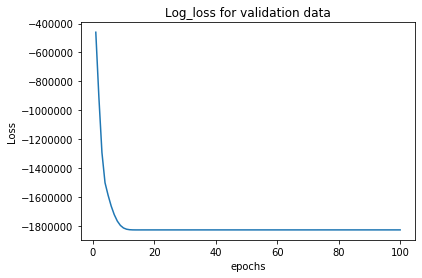

<Figure size 432x288 with 0 Axes>

In [56]:
_,M = X_train.shape
beta_init = np.zeros((M,1))   

Model = Poisson_reg(beta_init,lr = 5e-7,reg_type = None,reg_param = None)
beta_converged  =  Model.run_epochs(X_train,Y_train,X_validation,Y_validation,100,show_reg = 1)
valid_error = Model.rmse(X_validation,Y_validation,beta_converged)
test_error = Model.rmse(X_test,Y_test,beta_converged)
Model.plot_loss()
print('Error  for Validation_Data %d: '%(valid_error) )
print('Error  for testing_Data %d: '%(test_error) )

print("BETA AT CONVERGENCE")

display(Matrix(np.round(beta_converged,decimals = 3) ))

## L1 regularised
### Setup :  lr = 5e-7 (NOTE :  I updated weights without dividing them with no. of data points, hence lr is low)
### epochs = 100
### Finding hyperparamerter for L1 reg. :  Best pick : 0.025


In [60]:
### finding hyper parameter for L1 from rmse for validation data
### We can choose 

_,M = X_train.shape
beta_init = np.zeros((M,1))   

lam = np.linspace(0.1,1e-16,25)
for i in (lam):
    
    Model = Poisson_reg(beta_init,lr = 5e-7,reg_type = "L1",reg_param = i)
    beta_converged  =  Model.run_epochs(X_train,Y_train,X_validation,Y_validation,epochs = 100)
    valid_error = Model.rmse(X_validation,Y_validation,beta_converged)

    print('RMSE for hyper_param : %f for Validation_Data =  %d '%(i,valid_error) )

RMSE for hyper_param : 0.100000 for Validation_Data =  163 
RMSE for hyper_param : 0.095833 for Validation_Data =  162 
RMSE for hyper_param : 0.091667 for Validation_Data =  161 
RMSE for hyper_param : 0.087500 for Validation_Data =  160 
RMSE for hyper_param : 0.083333 for Validation_Data =  159 
RMSE for hyper_param : 0.079167 for Validation_Data =  158 
RMSE for hyper_param : 0.075000 for Validation_Data =  157 
RMSE for hyper_param : 0.070833 for Validation_Data =  157 
RMSE for hyper_param : 0.066667 for Validation_Data =  156 
RMSE for hyper_param : 0.062500 for Validation_Data =  155 
RMSE for hyper_param : 0.058333 for Validation_Data =  155 
RMSE for hyper_param : 0.054167 for Validation_Data =  154 
RMSE for hyper_param : 0.050000 for Validation_Data =  154 
RMSE for hyper_param : 0.045833 for Validation_Data =  153 
RMSE for hyper_param : 0.041667 for Validation_Data =  153 
RMSE for hyper_param : 0.037500 for Validation_Data =  152 
RMSE for hyper_param : 0.033333 for Vali

### Results for hyperparameter : 0.025

###############################################
 Regularistion type = L1
###############################################
Error for Validation_Data 151: 
Error  for testing_Data 157: 

 BETA AT CONVERGENCE 



Matrix([
[ 5.098],
[-0.076],
[ 0.173],
[ 0.322],
[-0.026],
[ -0.15],
[ 0.049],
[ 0.296]])

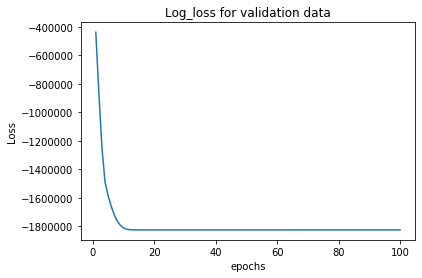

<Figure size 432x288 with 0 Axes>

In [62]:
#### Choosing reg_param = 0.025

_,M = X_train.shape
beta_init = np.zeros((M,1))   

Model = Poisson_reg(beta_init,lr = 5e-7,reg_type = "L1",reg_param = 0.025)
beta_converged  =  Model.run_epochs(X_train,Y_train,X_validation,Y_validation,100,show_reg = 1)
valid_error = Model.rmse(X_validation,Y_validation,beta_converged)
test_error = Model.rmse(X_test,Y_test,beta_converged)
Model.plot_loss()
print('Error for Validation_Data %d: '%(valid_error) )
print('Error  for testing_Data %d: '%(test_error) )

print("\n BETA AT CONVERGENCE \n")

display(Matrix(np.round(beta_converged,decimals = 3) ))

## L2 regularised
### Setup :  lr = 5e-7 (NOTE :  I updated weights without dividing them with no. of data points, hence lr is low)
### epochs = 100

### Finding hyperparameter from Validation data rmse
### Best Pick  : hyperparameter : lamda = 0.008

In [63]:
### finding hyper parameter for L2 from rmse for validation data
### We can choose the parameter by evaluating the validation loss

_,M = X_train.shape
beta_init = np.zeros((M,1))   

lam = np.linspace(0.1,1e-11,30)
for i in (lam):
    
    Model = Poisson_reg(beta_init,lr = 5e-7,reg_type = "L2",reg_param = i)
    beta_converged  =  Model.run_epochs(X_train,Y_train,X_validation,Y_validation,epochs = 100)
    valid_error = Model.rmse(X_validation,Y_validation,beta_converged)

    print('RMSE for hyper_param : %f for Validation_Data =  %d '%(i,valid_error) )

RMSE for hyper_param : 0.100000 for Validation_Data =  182 
RMSE for hyper_param : 0.096552 for Validation_Data =  181 
RMSE for hyper_param : 0.093103 for Validation_Data =  179 
RMSE for hyper_param : 0.089655 for Validation_Data =  178 
RMSE for hyper_param : 0.086207 for Validation_Data =  176 
RMSE for hyper_param : 0.082759 for Validation_Data =  175 
RMSE for hyper_param : 0.079310 for Validation_Data =  173 
RMSE for hyper_param : 0.075862 for Validation_Data =  172 
RMSE for hyper_param : 0.072414 for Validation_Data =  171 
RMSE for hyper_param : 0.068966 for Validation_Data =  169 
RMSE for hyper_param : 0.065517 for Validation_Data =  168 
RMSE for hyper_param : 0.062069 for Validation_Data =  166 
RMSE for hyper_param : 0.058621 for Validation_Data =  165 
RMSE for hyper_param : 0.055172 for Validation_Data =  164 
RMSE for hyper_param : 0.051724 for Validation_Data =  163 
RMSE for hyper_param : 0.048276 for Validation_Data =  161 
RMSE for hyper_param : 0.044828 for Vali

### Results for hyperparameter : 0.008, lr = 5e-7, epochs = 100

###############################################
 Regularistion type = L2
###############################################
Error for  Validation_Data 151: 
Error for testing_Data 157: 

 BETA AT CONVERGENCE 



Matrix([
[ 5.051],
[ -0.04],
[ 0.182],
[ 0.358],
[ 0.004],
[-0.112],
[ 0.085],
[ 0.327]])

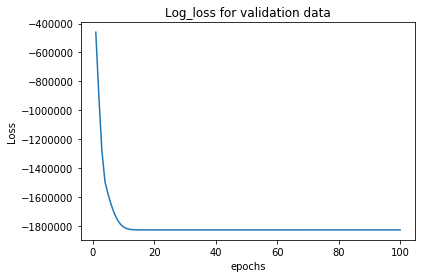

<Figure size 432x288 with 0 Axes>

In [64]:
_,M = X_train.shape
beta_init = np.zeros((M,1))   

Model = Poisson_reg(beta_init,lr = 5e-7,reg_type = "L2",reg_param = 0.008)
beta_converged =  Model.run_epochs(X_train,Y_train,X_validation,Y_validation,100,show_reg = 1)
valid_error = Model.rmse(X_validation,Y_validation,beta_converged)
test_error = Model.rmse(X_test,Y_test,beta_converged)
Model.plot_loss()
print('Error for  Validation_Data %d: '%(valid_error) )
print('Error for testing_Data %d: '%(test_error) )
print("\n BETA AT CONVERGENCE \n")

display(Matrix(np.round(beta_converged,decimals =3)))